### Figure 2b for Siddiqui et al 

In [1]:
import oceanspy as ospy
import xarray as xr
import matplotlib.pyplot as plt 
import cmocean
import cartopy.crs as ccrs
import numpy as np
import xarray as xr

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': '24',
         'axes.titlesize':'24',
         'xtick.labelsize':'24',
         'ytick.labelsize':'24'}
pylab.rcParams.update(params)

In [3]:
pylab.rcParams.update({
  "text.usetex": True
})
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

In [4]:
data_dir = '/home/idies/workspace/Storage/asiddi24/persistent/SciServer/Chapter_1/Siddiqui_etal_JGR_2023/data/'

ecco_sal = xr.open_dataset(data_dir+'iceland_basin_salt_anomaly_ecco_H2020a.nc')
aste_sal_h20b = xr.open_dataset(data_dir+'iceland_basin_salt_anomaly_ASTE_h20b.nc')
en4_sal_h20b = xr.open_dataset(data_dir+'iceland_basin_salt_anomaly_en4_h20b.nc')

# ecco_sal = xr.open_dataset(data_dir+'iceland_basin_sal_ecco_H2020a.nc')
# aste_sal_h20b = xr.open_dataset(data_dir+'iceland_basin_sal_ASTE_h20b.nc')
# en4_sal_h20b = xr.open_dataset(data_dir+'iceland_basin_sal_en4_h20b.nc')

In [5]:
# # data from RAPID

# rapid_ds = xr.open_dataset('data/moc_transports.nc')
# rapid_ds

In [6]:
# rapid_ds = rapid_ds.resample(time="M").mean()
# rapid_ds

In [7]:
ecco_sal.time

<xarray.DataArray 'time' (time: 310)>
array(['1992-02-15T12:00:00.000000000', '1992-03-16T12:00:00.000000000',
       '1992-04-16T00:00:00.000000000', ..., '2017-09-16T00:00:00.000000000',
       '2017-10-16T12:00:00.000000000', '2017-11-16T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    timestep  (time) int64 ...
  * time      (time) datetime64[ns] 1992-02-15T12:00:00 ... 2017-11-16
    month     (time) int64 ...
Attributes:
    long_name:  center time of averaging period
    bounds:     time_bnds
    axis:       T

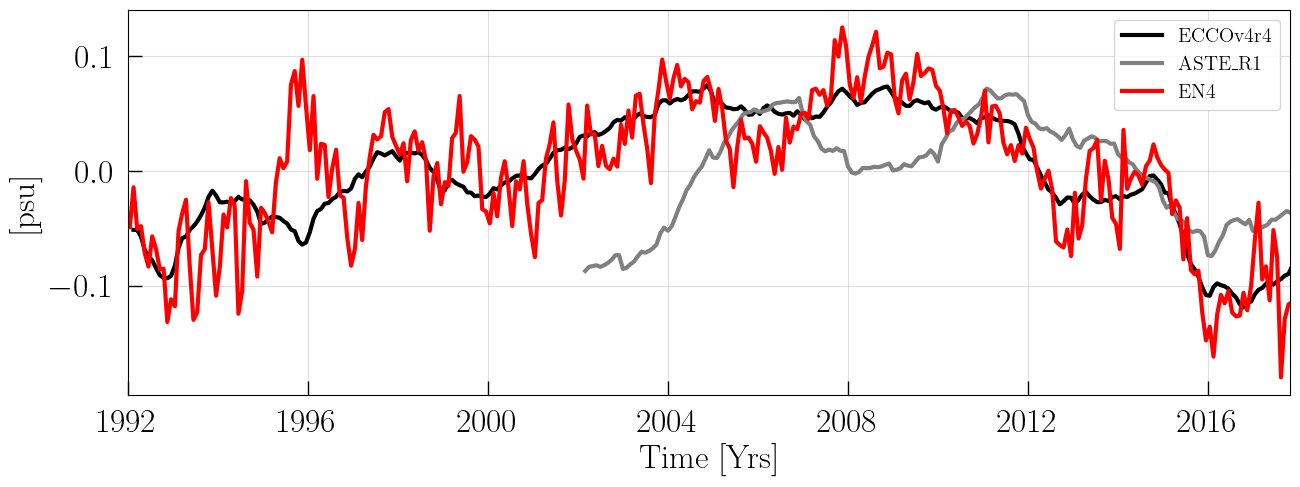

In [8]:
#from matplotlib.ticker import AutoMinorLocator
import datetime

fig, ax = plt.subplots()
plt.plot(ecco_sal.time, ecco_sal['__xarray_dataarray_variable__'],color='black', linewidth=3, label='ECCOv4r4')
#plt.plot(aste_sal.time, aste_sal.ds_salt_ice, color='black', label='ASTE')
plt.plot(aste_sal_h20b.time, aste_sal_h20b.ds_salt_ice, color='gray', linewidth=3, label=r'ASTE\textunderscore R1')
plt.plot(en4_sal_h20b.time.sel(time=slice("1992-01-01","2017-12-15")), en4_sal_h20b.sal_ENA_en4.sel(time=slice("1992-01-01","2017-12-15")), color='r', linewidth=3, label='EN4')
#rolling(time=4, center=True).mean()
plt.grid()
#plt.title('salinity anomaly (0-200m) ECCO, EN4 in ESNA')
plt.ylabel('[psu]')
plt.xlabel('Time [Yrs]')
#plt.ylim(-0.2,0.2)
plt.legend()
ax.grid(True, alpha=0.4)
ax.tick_params(which='both',
               labelcolor='k', 
               labelsize=24, 
               direction='in',
               width=1,
               length=10,
               pad=10)

ax.set_xlim([datetime.date(1992, 1, 1), datetime.date(2017,11,1)])
# ax.xaxis.set_minor_locator(AutoMinorLocator())
# ax.yaxis.set_minor_locator(AutoMinorLocator())
# ax.tick_params(which='minor', direction='in', length=5, width=1, color='k')

# ax2= ax.twinx()
# ax2.plot(rapid_ds.time, rapid_ds.moc_mar_hc10, linewidth=3, color='magenta', label = 'AMOC')
# ax2.legend(loc=2)
# ax2.set_ylabel('[Sv]')
plt.savefig('figs/fig_1_a.pdf', format='pdf', bbox_inches='tight', facecolor='white', dpi=300)
#plt.savefig('figs/JC_Yr5_EN4_blank.png', format='png', bbox_inches='tight', facecolor='white', dpi=300)


## std and mean of the diff between EN4 and ECCO

In [9]:
diff = ecco_sal['__xarray_dataarray_variable__'] - en4_sal_h20b.sal_ENA_en4.sel(time=slice("1992-02-01","2017-12-15"))

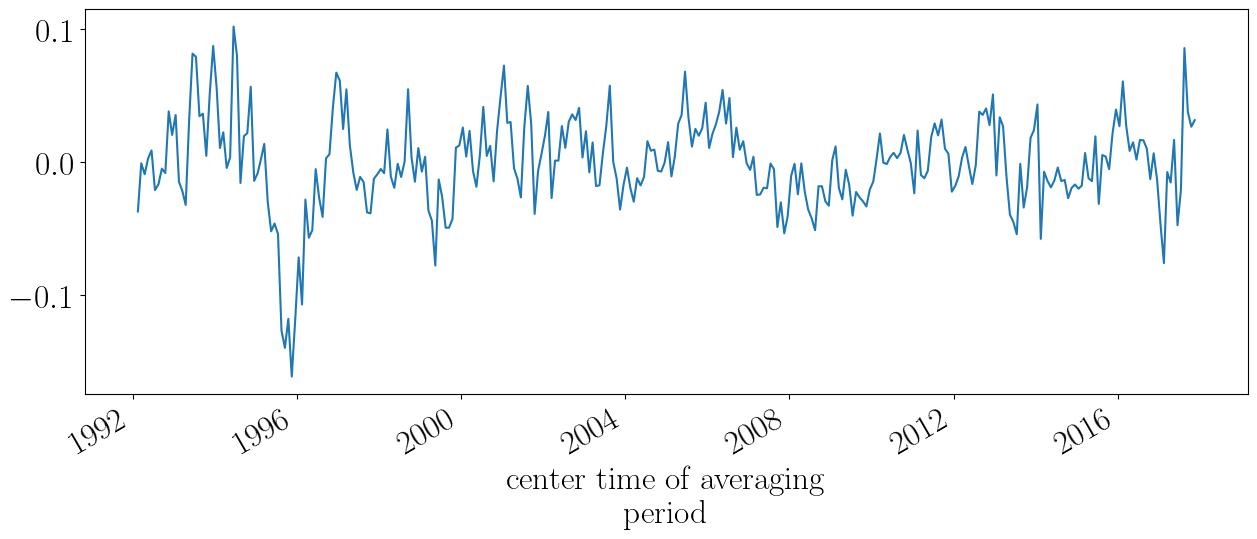

In [10]:
diff.plot()

In [11]:
diff.mean()

<xarray.DataArray ()>
array(-0.00096035)

In [12]:
diff.std()

<xarray.DataArray ()>
array(0.03481113)